In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import tensorflow as tf
from tensorflow import keras

In [19]:


fashion_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [20]:


X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.



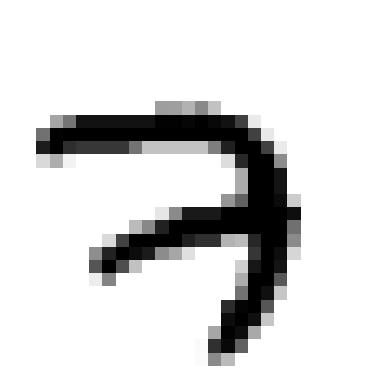

In [21]:


plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()



In [23]:


class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]




Saving figure fashion_mnist_plot


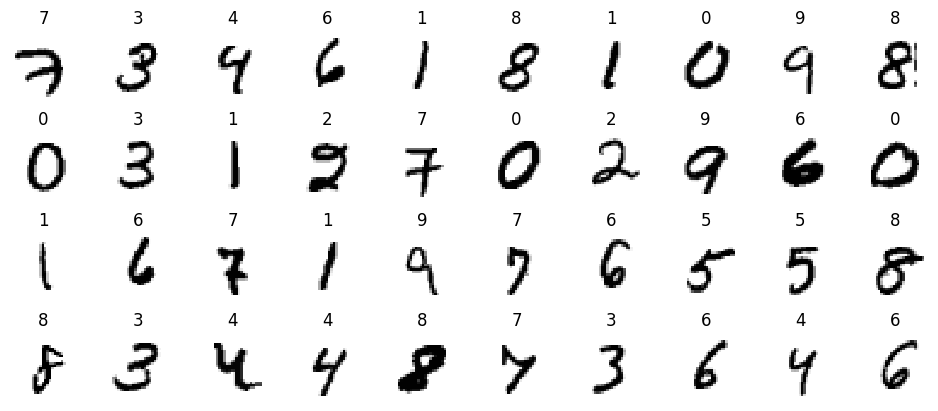

In [24]:


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()



Epoch 1/30


c:\Users\biggi\miniconda3\envs\labb7\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6372 - loss: 1.1911 - val_accuracy: 0.9122 - val_loss: 0.3288
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8796 - loss: 0.4003 - val_accuracy: 0.9316 - val_loss: 0.2499
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9092 - loss: 0.3104 - val_accuracy: 0.9420 - val_loss: 0.2100
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9208 - loss: 0.2667 - val_accuracy: 0.9504 - val_loss: 0.1794
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9305 - loss: 0.2363 - val_accuracy: 0.9566 - val_loss: 0.1607
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9396 - loss: 0.2101 - val_accuracy: 0.9588 - val_loss: 0.1467
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9453 - loss: 0.1863 - val_accuracy: 0.9638 - val_loss: 0.1333
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9509 - loss: 0.1705 - val_accurac

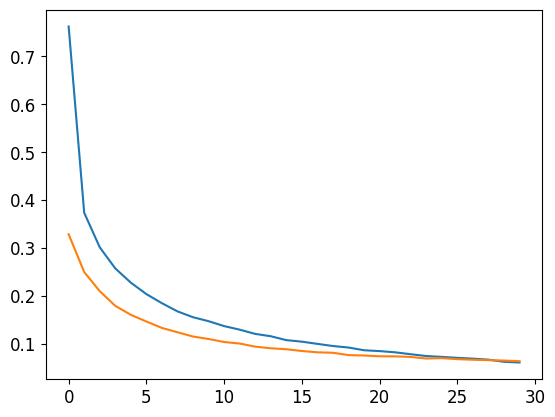

In [25]:
# Neural Network model with Flatten, Dense, and Dropout layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])  


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",  
                metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')


In [31]:
# Hyperparameter tuning with Keras Tuner with batch size, number of layers, units per layer, dropout rate, and learning rate
import keras_tuner as kt

def build_model(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    
    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 5)):
        # Tune the number of units per layer
        units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units, activation='relu'))
        
        # Tune the dropout rate
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        model.add(keras.layers.Dropout(dropout_rate))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    # Tune the learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='LOG')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [ ]:
#Show results of hyperparameter tuning using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='mnist_tuning'
)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model.summary()
print("Best hyperparameters:", best_hyperparameters.values)
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
#Show hyperparameter space exploration results in a graph
plot = tuner.results_summary()
save_fig('hyperparameter_tuning_results', tight_layout=False)






Reloading Tuner from my_dir\mnist_tuning\tuner0.json


c:\Users\biggi\miniconda3\envs\labb7\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\biggi\miniconda3\envs\labb7\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 416)            │       326,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       213,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,194 (2.08 MB)

 Trainable params: 545,194 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Best hyperparameters: {'num_layers': 2, 'units_0': 416, 'dropout_0': 0.2, 'learning_rate': 0.0001227714848853414, 'units_1': 512, 'dropout_1': 0.4, 'units_2': 480, 'dropout_2': 0.0, 'units_3': 320, 'dropout_3': 0.2, 'units_4': 64, 'dropout_4': 0.1}
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9806 - loss: 0.0692
Test accuracy: 0.9835
Results summary
Results in my_dir\mnist_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
num_layers: 2
units_0: 416
dropout_0: 0.2
learning_rate: 0.0001227714848853414
units_1: 512
dropout_1: 0.4
units_2: 480
dropout_2: 0.0
units_3: 320
dropout_3: 0.2
units_4: 64
dropout_4: 0.1
Score: 0.9829999804496765

Trial 02 summary
Hyperparameters:
num_layers: 5
units_0: 384
dropout_0: 0.1
learning_rate: 0.00024635460780020557
units_1: 160
dropout_1: 0.4
units_2: 448
dropout_2: 0.2
units_3: 32
dropout_3: 0.0
units_4: 32
dropout_4: 0.0
Score: 0.9814000129699707

Trial 00 summary
Hyperparameter

SyntaxError: unexpected EOF while parsing (1366582894.py, line 2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step


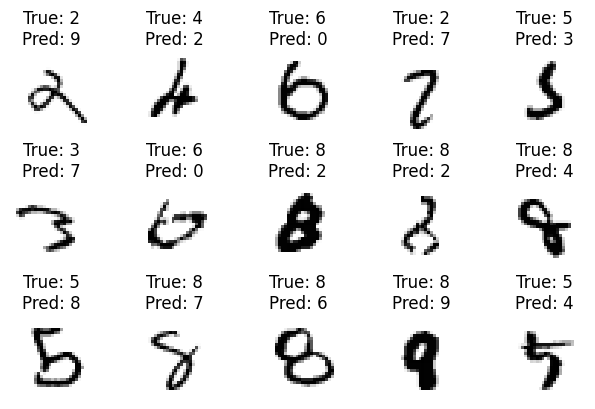

In [ ]:
#Show model predictions and some examples where the model got it wrong
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
misclassified_indices = np.where(y_pred_classes != y_test)[0]
n_rows = 3
n_cols = 5


plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for i in range(n_rows * n_cols):
    index = misclassified_indices[i]
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(f'True: {class_names[y_test[index]]}\nPred: {class_names[y_pred_classes[index]]}', fontsize=12)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

